In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import seaborn as sns 

In [379]:
# Try reading the file using a different encoding
try:
    df = pd.read_csv('akc_breed_info.csv', encoding='latin1')  # Change 'your_file.csv' to your file's path
    # If 'latin1' doesn't work, you can try other encodings like 'ISO-8859-1' or 'cp1252'
    # If none of these work, you might need to determine the correct encoding of your file.
    # Tools like 'chardet' can help auto-detect encoding.
    
    # Once read, you might want to check and handle any non-UTF-8 characters in the dataframe.
    # df = df.applymap(lambda x: x.encode('utf-8').decode('utf-8', 'ignore') if isinstance(x, str) else x)

    # If the file has non-UTF-8 characters, the above line may help handle them by encoding and decoding again.
    
    # Now you can work with your dataframe 'df'
except UnicodeDecodeError:
    print("Unable to read the file with the specified encoding.")

df

,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,Akita,26,28,80,120
1,Anatolian Sheepdog,27,29,100,150
2,Bernese Mountain Dog,23,27,85,110
3,Bloodhound,24,26,80,120
4,Borzoi,26,28,70,100
...,...,...,...,...,...
145,Papillon,8,11,5,10
146,Pomeranian,12,12,3,7
147,Poodle Toy,10,10,10,10
148,Toy Fox Terrier,10,10,4,7


In [380]:
df.dtypes

Breed                 object
height_low_inches     object
height_high_inches    object
weight_low_lbs        object
weight_high_lbs       object
dtype: object

In [381]:
# df.height_low_inches.unique()

# df['height_low_inches'] = df ['height_low_inches'].replace(to_replace=['na', 'not found'], value=None, regex=True)

# df['height_high_inches'] = df ['height_high_inches'].replace(to_replace=['na', 'not found'], value=None, regex=True)

# df['weight_low_lbs'] = df ['weight_low_lbs'].replace(to_replace=['na', 'not found'], value=None, regex=True)

# df['weight_high_lbs'] = df ['weight_high_lbs'].replace(to_replace=['na', 'not found'], value=None, regex=True)

# df.weight_high_lbs.unique()

In [382]:
cols = ['height_low_inches','height_high_inches','weight_low_lbs','weight_high_lbs']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce') #'coerce' converts non-convertible values to NaN por lo que lo anterior no haría falta
df.dtypes

Breed                  object
height_low_inches     float64
height_high_inches    float64
weight_low_lbs        float64
weight_high_lbs       float64
dtype: object

In [383]:
values_inches = ['height_low_inches','height_high_inches']
values_lbs = ['weight_low_lbs','weight_high_lbs']

In [384]:
def lbs_to_kg(weight_in_lbs):
    return weight_in_lbs * 0.453592

def inches_to_cm(length_in_inches):
    return length_in_inches * 2.54

In [385]:
df[values_lbs] = df[values_lbs].apply(lambda x: lbs_to_kg(x))
df[values_inches] = df[values_inches].apply(lambda x: inches_to_cm(x))
df = df.rename(columns = {'height_low_inches': 'height_low_cm','height_high_inches': 'height_high_cm','weight_low_lbs': 'weight_low_kg','weight_high_lbs': 'weight_high_kg'})
df


,Breed,height_low_cm,height_high_cm,weight_low_kg,weight_high_kg
0,Akita,66.04,71.12,36.287360,54.431040
1,Anatolian Sheepdog,68.58,73.66,45.359200,68.038800
2,Bernese Mountain Dog,58.42,68.58,38.555320,49.895120
3,Bloodhound,60.96,66.04,36.287360,54.431040
4,Borzoi,66.04,71.12,31.751440,45.359200
...,...,...,...,...,...
145,Papillon,20.32,27.94,2.267960,4.535920
146,Pomeranian,30.48,30.48,1.360776,3.175144
147,Poodle Toy,25.40,25.40,4.535920,4.535920
148,Toy Fox Terrier,25.40,25.40,1.814368,3.175144


In [386]:
cols = ['height_low_cm','height_high_cm','weight_low_kg','weight_high_kg']
df[cols] = df[cols].round(1)
df

,Breed,height_low_cm,height_high_cm,weight_low_kg,weight_high_kg
0,Akita,66.0,71.1,36.3,54.4
1,Anatolian Sheepdog,68.6,73.7,45.4,68.0
2,Bernese Mountain Dog,58.4,68.6,38.6,49.9
3,Bloodhound,61.0,66.0,36.3,54.4
4,Borzoi,66.0,71.1,31.8,45.4
...,...,...,...,...,...
145,Papillon,20.3,27.9,2.3,4.5
146,Pomeranian,30.5,30.5,1.4,3.2
147,Poodle Toy,25.4,25.4,4.5,4.5
148,Toy Fox Terrier,25.4,25.4,1.8,3.2


In [410]:
df ['height_mean_cm'] = df[['height_low_cm','height_high_cm']].mean (axis=1)
df ['weight_mean_kg'] = df[['weight_low_kg','weight_high_kg']].mean (axis=1)

df

,Breed,height_low_cm,height_high_cm,weight_low_kg,weight_high_kg,weight_mean_kg,height_mean_cm
0,Akita,66.0,71.1,36.3,54.4,45.35,68.55
1,Anatolian Sheepdog,68.6,73.7,45.4,68.0,56.70,71.15
2,Bernese Mountain Dog,58.4,68.6,38.6,49.9,44.25,63.50
3,Bloodhound,61.0,66.0,36.3,54.4,45.35,63.50
4,Borzoi,66.0,71.1,31.8,45.4,38.60,68.55
...,...,...,...,...,...,...,...
145,Papillon,20.3,27.9,2.3,4.5,3.40,24.10
146,Pomeranian,30.5,30.5,1.4,3.2,2.30,30.50
147,Poodle Toy,25.4,25.4,4.5,4.5,4.50,25.40
148,Toy Fox Terrier,25.4,25.4,1.8,3.2,2.50,25.40


Abrimos el segundo csv

In [411]:
df2 = pd.read_csv ('dog_intelligence.csv', sep=',')
df2

,Breed,Classification,obey,reps_lower,reps_upper
0,Border Collie,Brightest Dogs,95%,1,4
1,Poodle,Brightest Dogs,95%,1,4
2,German Shepherd,Brightest Dogs,95%,1,4
3,Golden Retriever,Brightest Dogs,95%,1,4
4,Doberman Pinscher,Brightest Dogs,95%,1,4
...,...,...,...,...,...
131,Borzoi,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
132,Chow Chow,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
133,Bulldog,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
134,Basenji,Lowest Degree of Working/Obedience Intelligence,NaN,81,100


In [412]:
df2.Classification.unique()

array(['Brightest Dogs', 'Excellent Working Dogs',
       'Above Average Working Dogs',
       'Average Working/Obedience Intelligence',
       'Fair Working/Obedience Intelligence',
       'Lowest Degree of Working/Obedience Intelligence '], dtype=object)

In [413]:
df2.Classification = df2.Classification.replace(to_replace = ['Brightest Dogs',
                                                              'Excellent Working Dogs',
                                                              'Above Average Working Dogs',
                                                              'Average Working/Obedience Intelligence',
                                                              'Fair Working/Obedience Intelligence',
                                                              'Lowest Degree of Working/Obedience Intelligence'],
                                                    value = ['Brightest',
                                                             'Excellent',
                                                             'Above average',
                                                             'Average', 
                                                             'Fair',
                                                             'Lowest'],
                                                    regex = True
                                                    )

df2

,Breed,Classification,obey,reps_lower,reps_upper
0,Border Collie,Brightest,95%,1,4
1,Poodle,Brightest,95%,1,4
2,German Shepherd,Brightest,95%,1,4
3,Golden Retriever,Brightest,95%,1,4
4,Doberman Pinscher,Brightest,95%,1,4
...,...,...,...,...,...
131,Borzoi,Lowest,NaN,81,100
132,Chow Chow,Lowest,NaN,81,100
133,Bulldog,Lowest,NaN,81,100
134,Basenji,Lowest,NaN,81,100


In [415]:
df2 = df2.rename(columns={'obey':'obey_%'})
df2['obey_%'] = df2['obey_%'].replace (to_replace='%', value='', regex=True)

df2

,Breed,Classification,obey_%,reps_lower,reps_upper
0,Border Collie,Brightest,95,1,4
1,Poodle,Brightest,95,1,4
2,German Shepherd,Brightest,95,1,4
3,Golden Retriever,Brightest,95,1,4
4,Doberman Pinscher,Brightest,95,1,4
...,...,...,...,...,...
131,Borzoi,Lowest,NaN,81,100
132,Chow Chow,Lowest,NaN,81,100
133,Bulldog,Lowest,NaN,81,100
134,Basenji,Lowest,NaN,81,100


In [416]:
df2['obey_%'] = df2['obey_%'].fillna(0)
df2['obey_%'].unique()

array(['95', '85', '70', '50', '30', 0], dtype=object)

In [417]:
df2['obey_%'] = df2['obey_%'].apply(pd.to_numeric, errors='coerce')
df2['obey_%'].dtypes

dtype('int64')

Creamos gráfico para ver relación entre clasificación y porcentaje de obediencia

In [418]:
# Crear un dataframe agrupado por la columna categórica

df2_grouped = df2.groupby('Classification').agg({'obey_%': np.mean}).sort_values(by='obey_%', ascending=False)
df2_grouped

C:\Users\anape\AppData\Local\Temp\ipykernel_8492\2341733645.py:3: FutureWarning: The provided callable <function mean at 0x000001DBDC0A7060> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df2_grouped = df2.groupby('Classification').agg({'obey_%': np.mean}).sort_values(by='obey_%', ascending=False)


,obey_%
Classification,
Brightest,95.0
Excellent,85.0
Above average,70.0
Average,50.0
Fair,30.0
Lowest,0.0


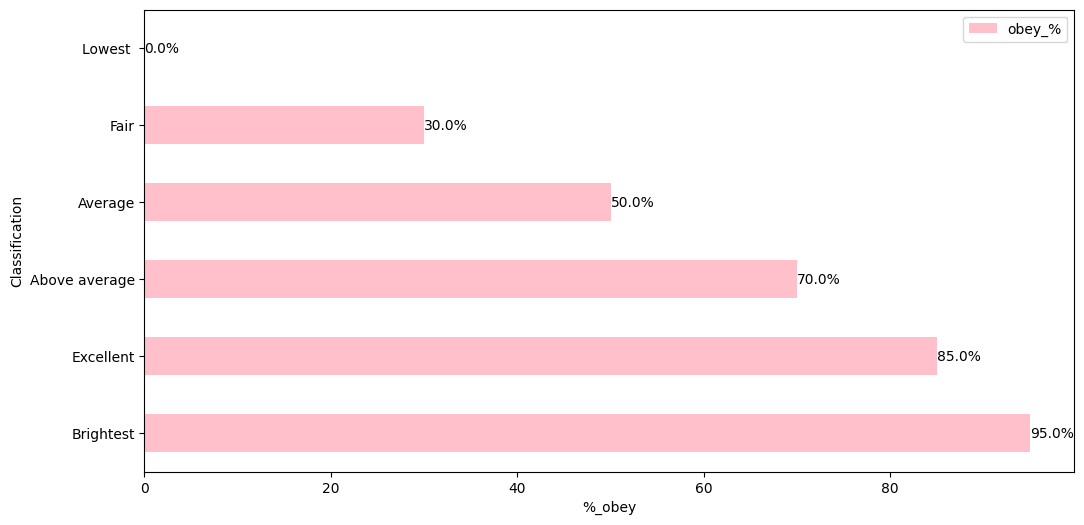

In [419]:
#Crear histograma horizontal
ax = df2_grouped.plot(kind='barh', y='obey_%', figsize=(12,6), xlabel= '%_obey', ylabel='Classification', color='pink')

# Añadir valores encima de las barras
for i, value in enumerate(df2_grouped['obey_%']):
    ax.text(value, i, str(value) + '%', va='center')

plt.show()

# plt.figure(figsize=(12, 6))

# plt.barh(df2_grouped.index, df2_grouped['obey_%'], color="#00b894")
# plt.show()

Ahora combino dataframes de tamaño e inteligencia

In [420]:
df_merged = pd.merge(df, df2, on='Breed')
df_merged

,Breed,height_low_cm,height_high_cm,weight_low_kg,weight_high_kg,weight_mean_kg,height_mean_cm,Classification,obey_%,reps_lower,reps_upper
0,Akita,66.0,71.1,36.3,54.4,45.35,68.55,Average,50,26,40
1,Bernese Mountain Dog,58.4,68.6,38.6,49.9,44.25,63.50,Excellent,85,5,15
2,Bloodhound,61.0,66.0,36.3,54.4,45.35,63.50,Lowest,0,81,100
3,Borzoi,66.0,71.1,31.8,45.4,38.60,68.55,Lowest,0,81,100
4,Bullmastiff,63.5,68.6,45.4,59.0,52.20,66.05,Fair,30,41,80
...,...,...,...,...,...,...,...,...,...,...,...
100,Japanese Chin,20.3,27.9,1.8,5.0,3.40,24.10,Fair,30,41,80
101,Maltese,20.3,25.4,1.8,2.7,2.25,22.85,Fair,30,41,80
102,Papillon,20.3,27.9,2.3,4.5,3.40,24.10,Brightest,95,1,4
103,Pomeranian,30.5,30.5,1.4,3.2,2.30,30.50,Excellent,85,5,15


In [421]:
df_merged['weight_mean_kg'].max()

82.80000000000001

Quiero ver si existe relación entre tamaño e inteligencia

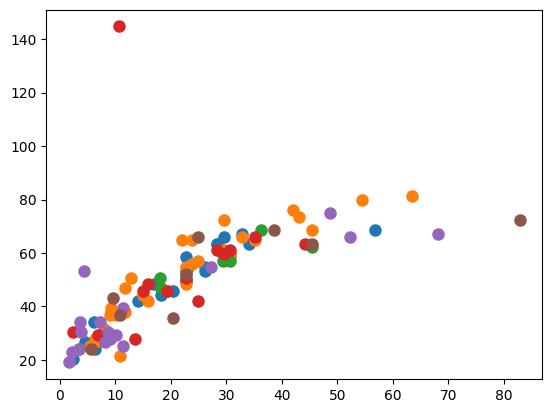

In [422]:
#quiero hacer un scatter plot donde se relaciones peso y altura (ejes x e y) con clasificación raza (color burbuja)
groups = df_merged.groupby('Classification')
for name, group in groups:
    plt.plot(group['weight_mean_kg'], group['height_mean_cm'], marker='o', linestyle='', markersize=8, label=name)

In [399]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

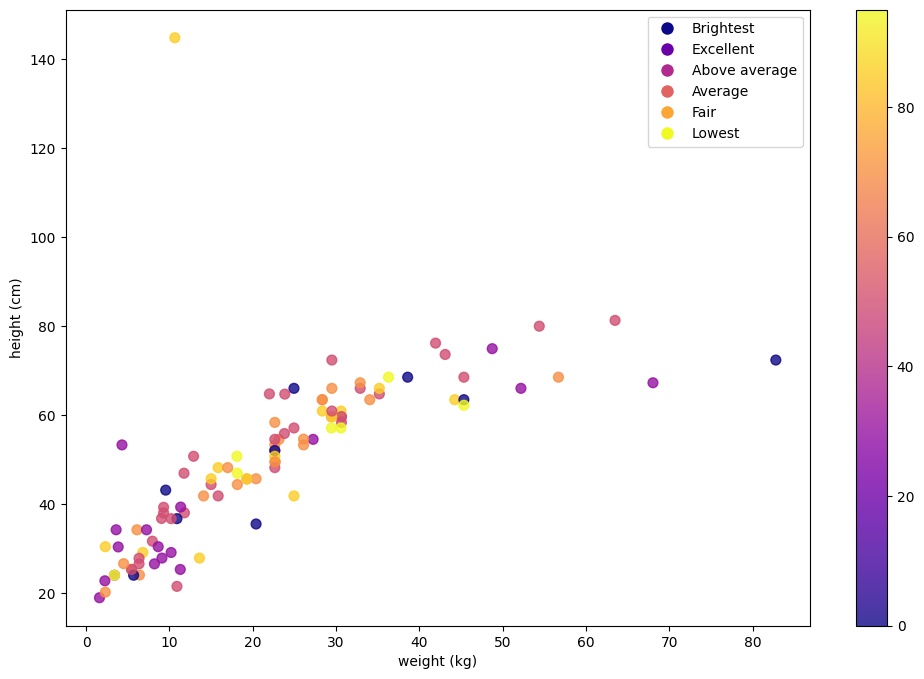

In [423]:
x = df_merged ['weight_mean_kg']
y = df_merged ['height_mean_cm']
colores = df_merged['obey_%']

# Modificar el tamaño de la figura
plt.figure(figsize=(12, 8))  

# Crear un scatter plot con colores según categoría
plt.scatter(x, y, c=colores, s=50, cmap='plasma', alpha=0.8)

# Agregar etiquetas a los ejes x e y
plt.xlabel('weight (kg)')
plt.ylabel('height (cm)')

# Agregar la leyenda a los colores
etiquetas = ['Brightest','Excellent','Above average','Average','Fair','Lowest']  # Lista de etiquetas para los grupos
colores_legenda = plt.cm.plasma(np.linspace(0, 1, len(etiquetas)))  # Obtener colores de la paleta

# Crear la leyenda
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colores_legenda]
plt.legend(handles, etiquetas, loc='best')

# Mostrar el gráfico
plt.colorbar()  # Añadir barra de color
plt.show()

In [401]:
#aparentemente no hay relación entre clasificación y el tamaño 
#habría que hacer test ANOVA para descartar posible relación

In [424]:
df_merged['weight_mean_kg'].unique()

array([45.35, 44.25, 38.6 , 52.2 , 63.5 , 48.75, 54.4 , 43.1 , 82.8 ,
       56.7 , 68.05, 24.95,   nan, 30.65, 28.35, 30.6 , 34.05, 29.45,
       22.7 , 32.9 , 36.3 , 28.35, 29.5 , 30.6 , 35.2 , 41.95, 20.4 ,
       15.85, 18.15, 22.65, 18.1 , 15.85, 27.25, 26.1 , 19.3 , 15.  ,
       22.  , 11.75, 17.  , 23.15, 23.85, 11.8 , 10.65, 23.8 ,  5.45,
        9.55, 10.9 ,  9.3 ,  6.35,  6.1 ,  9.05,  6.4 , 13.6 ,  7.95,
       10.9 ,  4.3 , 10.2 ,  7.25,  8.2 , 14.1 ,  6.8 ,  9.1 ,  8.65,
        5.7 , 11.3 ,  5.45, 11.35, 12.9 ,  4.5 ,  1.6 ,  3.85,  3.6 ,
        3.4 ,  2.25,  2.3 ])

In [432]:
df_merged[df_merged['weight_mean_kg'].isnull()]

,Breed,height_low_cm,height_high_cm,weight_low_kg,weight_high_kg,weight_mean_kg,height_mean_cm,Classification,obey_%,reps_lower,reps_upper
14,Alaskan Malamute,NaN,NaN,NaN,NaN,NaN,NaN,Average,50,26,40


In [434]:
df_merged.isnull().sum(axis=0) #hay 1 o 0 valores nulos por columna

Breed             0
height_low_cm     1
height_high_cm    1
weight_low_kg     1
weight_high_kg    1
weight_mean_kg    1
height_mean_cm    1
Classification    0
obey_%            0
reps_lower        0
reps_upper        0
dtype: int64

In [403]:
#Puesto que es una fila entera en la que no hay registro de variables numéricas, la borro entera

In [437]:
df_merged = df_merged[df_merged['Breed'] != 'Alaskan Malamute']

df_merged.isnull().sum(axis=0)


Breed             0
height_low_cm     0
height_high_cm    0
weight_low_kg     0
weight_high_kg    0
weight_mean_kg    0
height_mean_cm    0
Classification    0
obey_%            0
reps_lower        0
reps_upper        0
dtype: int64

In [438]:
from scipy.stats import f_oneway, ttest_ind

def relacion_variable_categorica_numerica(df, variable_categorica, variable_numerica):
    
    # Dividir los datos según la variable categórica
    categorias = df[variable_categorica].unique()
    grupos = [df[variable_numerica][df[variable_categorica] == categoria] for categoria in categorias]

    # Realizar el test ANOVA o el test t de Student según el número de categorías
    if len(categorias) > 2:
        estadistico, p_valor = f_oneway(*grupos)
    else:
        estadistico, p_valor = ttest_ind(*grupos)

    # Mostrar el resultado
    if p_valor < 0.05:
        print(f"El valor p es: {p_valor:.3f}")
        print("Hay evidencia de relación entre las variables.")
    else:
        print(f"El valor p es: {p_valor:.3f}")
        print("No hay suficiente evidencia para afirmar una relación entre las variables.")

# Ejemplo de uso:
# Suponiendo que df es tu DataFrame, 'Variable_Categorica' es la variable categórica, y 'Variable_Numerica' es la variable numérica.
relacion_variable_categorica_numerica(df_merged, 'Classification', 'weight_mean_kg')

El valor p es: 0.479
No hay suficiente evidencia para afirmar una relación entre las variables.
